In [1]:
!pip install python-igraph
!pip install matplotlib
from igraph import *
import matplotlib.pyplot as plt
import math

In [ ]:
## Download alle snapshots (uncomment degene die ge nodig hebt om)

In [2]:
!wget https://github.com/QuintenBruynseraede/ALSSN/blob/main/code/snapshots/1000258txs_bf_blocks_6249399_6430272.txt?raw=true
#!wget https://github.com/QuintenBruynseraede/ALSSN/blob/main/code/snapshots/1001864txs_bf_blocks_11948960_12150244.txt?raw=true
#!wget https://github.com/QuintenBruynseraede/ALSSN/blob/main/code/snapshots/1003812txs_bf_blocks_9976964_10176689.txt?raw=true
#!wget https://github.com/QuintenBruynseraede/ALSSN/blob/main/code/snapshots/1006153txs_bf_blocks_8062293_8261511.txt?raw=true
#!wget https://github.com/QuintenBruynseraede/ALSSN/blob/main/code/snapshots/988086txs_bf_blocks_4467005_4652925.txt?raw=true


g = Graph.Read_Ncol("1000258txs_bf_blocks_6249399_6430272.txt", directed=True)
print("Read graph: {} nodes, {} edges".format(len(g.vs),len(g.es)))

Read graph: 51176 nodes, 63393 edges


In [3]:
# Calculate some properties:
degree = g.degree()
betw = g.betweenness()
apl = g.average_path_length()
cls = g.closeness
pgrnk = g.pagerank()
clcof = g.transitivity_undirected()


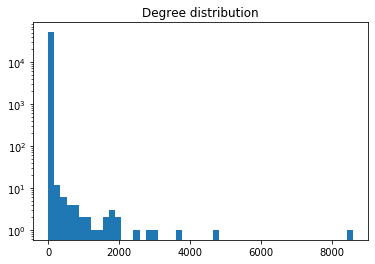

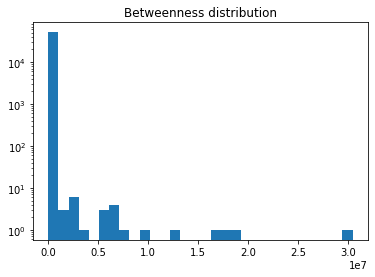

APL: 5.214216547223317


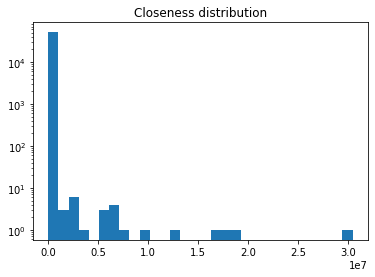

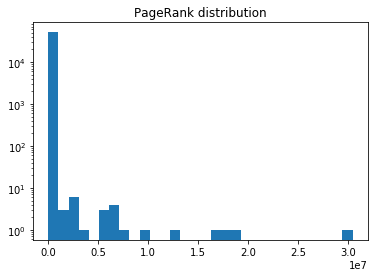

Transitivity_undirected: 2.3576329557488363e-06


In [4]:
# All functions: https://igraph.org/python/doc/api/igraph.Graph.html
plt.hist(degree, bins=50)
plt.yscale("log")
plt.title("Degree distribution")
plt.show()

plt.hist(betw, bins=30)
plt.yscale("log")
plt.title("Betweenness distribution")
plt.show()

print("APL: {}".format(apl))

# Simple Histogram of closeness distribution
plt.hist(betw, bins=30)
plt.yscale("log")
plt.title("Closeness distribution")
plt.show()

# Simple Histogram of PageRank distribution
plt.hist(betw, bins=30)
plt.yscale("log")
plt.title("PageRank distribution")
plt.show()

print("Transitivity_undirected: {}".format(clcof))

In [8]:
# layout = g.layout(layout='auto')
visual_style = {}
visual_style["vertex_size"] = 0.2
max_weight = math.log(max(g.es["weight"]))
# Scale edge_widths logarithmically to suppress large ranges
visual_style["edge_width"] = [0.1+(1.0*math.log(weight)/max_weight) for weight in g.es["weight"]]
visual_style["layout"] = layout
visual_style["bbox"] = (1000, 1000)
visual_style["margin"] = 20
plot(g, target='plots/plot.pdf')
print("Wrote graph plot to plot.pdf")

Wrote graph plot to plot.pdf
